In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Housing.csv')
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
list_mapping = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

mapping = {'yes': 1, 'no': 0, 'furnished':1, 'semi-furnished':0.5, 'unfurnished':0}

dataset[list_mapping] = dataset[list_mapping].replace(mapping)

dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [ ]:
X = dataset.iloc[:546, 2:].values
y = dataset.iloc[:546, 1].values


Set the values of independent variable to X & dependent variable to Y.

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_normalize = dataset.columns[2:]
scaler = StandardScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

Data should be normalize to avoid shift in graph

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Splitting of data into test and train(20, 80)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Declaration of model

In [ ]:
y_pred_train = regressor.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.2500109223335919

 Efficiency of the model for training data

In [ ]:
regressor.coef_

array([ 255.84930975,  330.91840884, -199.53471739, 1059.18502406,
        502.50052432, -486.89674983, -437.27366986,  626.41100478,
        587.82655494, 1033.34752167,  128.50335544])

Regression coefficent values

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(y_pred.shape)
print(y_test.shape)
concatenated = np.concatenate((y_pred, y_test))
print(concatenated)

(109,)
(109,)
[ 5044.9805  6378.7926  5275.1626  4064.4955  3525.3149  5717.4492
  5703.8384  3921.5438  5893.5101  6446.9164  5142.7599  4457.154
  3906.0055  4672.2925  4105.5403  3469.0003  3650.1562  4592.437
  2846.8205  6202.9035  4938.9592  4437.4338  5019.3133  4328.6506
  4675.5667  5629.6219  6314.5409  6109.6404  4567.8424  5829.5505
  4924.4142  5415.8524  7179.666   4860.1626  2409.5468  6726.4784
  5337.508   3906.0055  4144.9901  3911.4804  6191.0671  3957.1631
  4886.9106  4041.2886  6737.186   5150.697   5170.2001  4272.336
  4493.8321  7507.7041  4980.7288  5583.1003  2782.5688  4336.5877
  5116.0119  5732.5598  5214.9487  5236.5781  4336.5877  3841.7539
  5832.3418  6028.6213  3600.384   5603.2405  3929.4809  4588.167
  6676.7716  3800.9775  4169.7919  6394.5011  5003.6047  6041.4893
  5829.5505  4542.3963  4152.6567  5186.0043  3781.1642  6806.3425
  3597.5037  5369.9352  5003.6047  4170.7671  4492.7733  5083.565
  4648.7516  5037.0434  4287.6059  4978.6025  3970.25

Actual vs Predicated Data values

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.20080928388363806

Efficiency of model for testing data

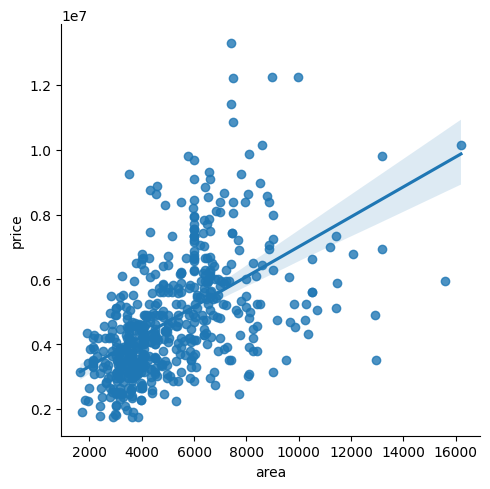

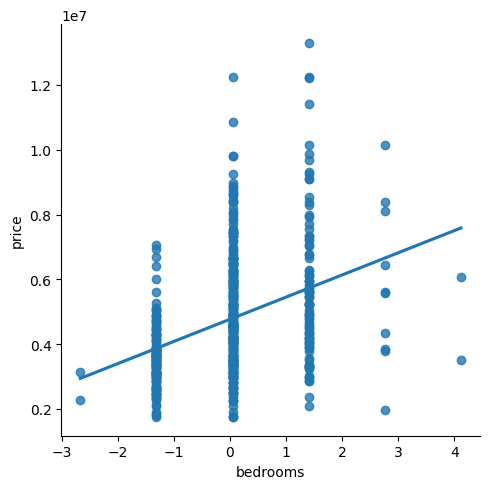

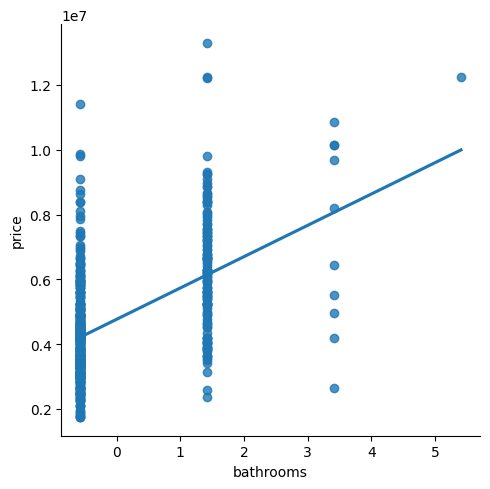

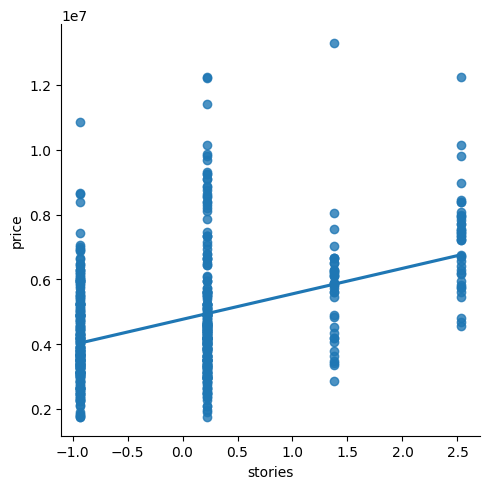

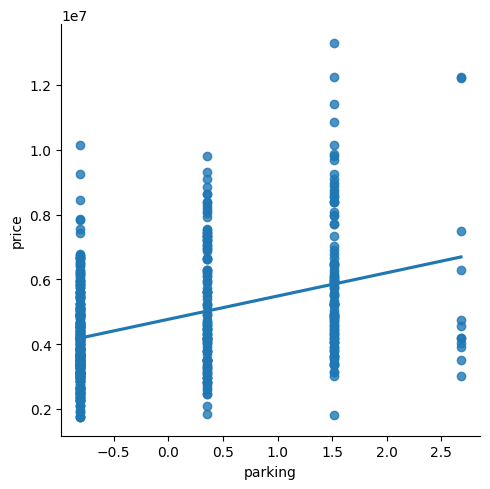

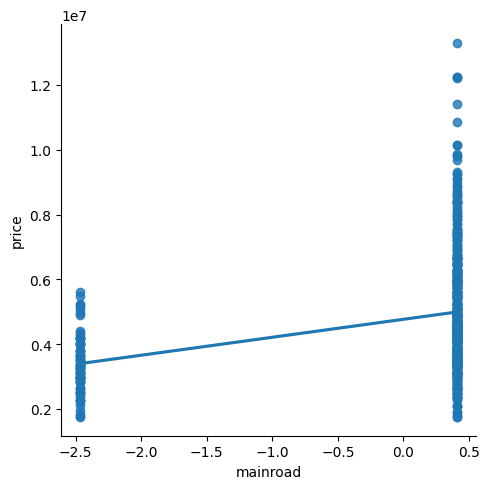

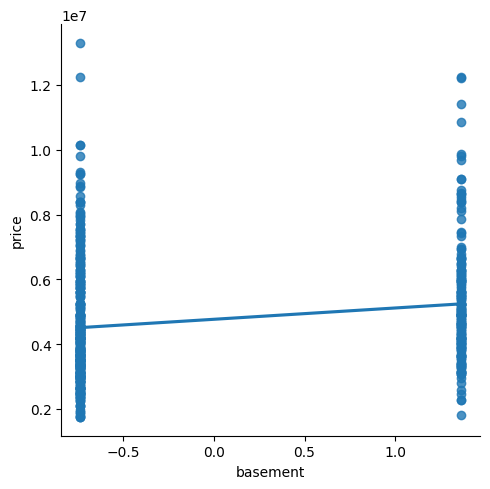

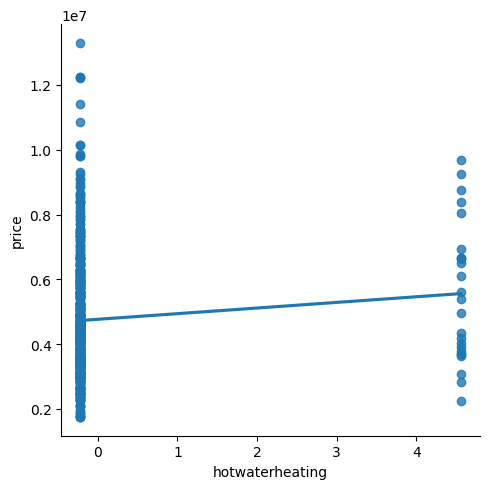

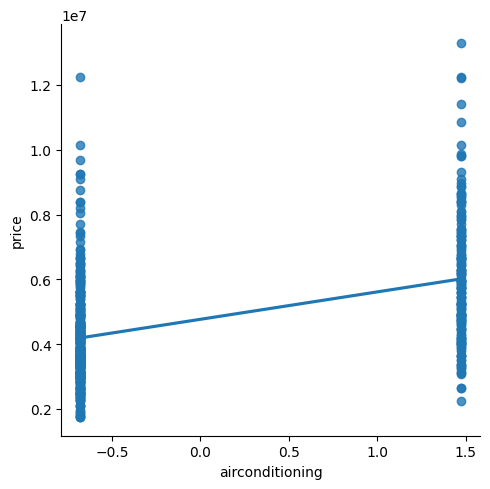

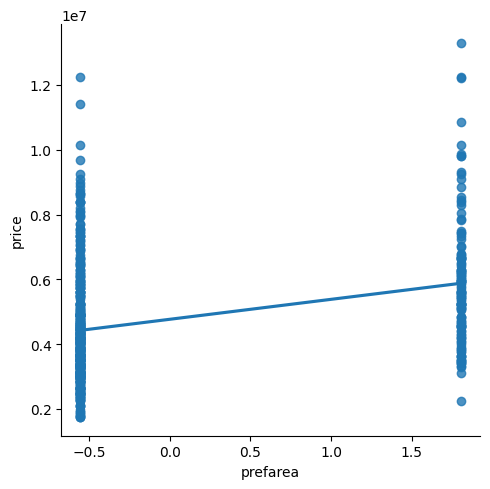

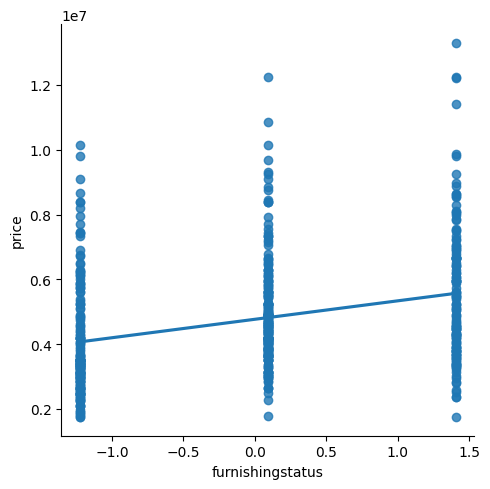

In [ ]:
#sns.lmplot(X_test, y_pred, data=dataset)
sns.lmplot(x='area', y='price', data=dataset)
sns.lmplot(x='bedrooms', y='price', data=dataset, ci=None)
sns.lmplot(x='bathrooms', y='price', data=dataset, ci=None)
sns.lmplot(x='stories', y='price', data=dataset, ci=None)
sns.lmplot(x='parking', y='price', data=dataset, ci=None)
sns.lmplot(x='mainroad', y='price', data=dataset, ci=None)
sns.lmplot(x='basement', y='price', data=dataset, ci=None)
sns.lmplot(x='hotwaterheating', y='price', data=dataset, ci=None)
sns.lmplot(x='airconditioning', y='price', data=dataset, ci=None)
sns.lmplot(x='prefarea', y='price', data=dataset, ci=None)
sns.lmplot(x='furnishingstatus', y='price', data=dataset, ci=None)

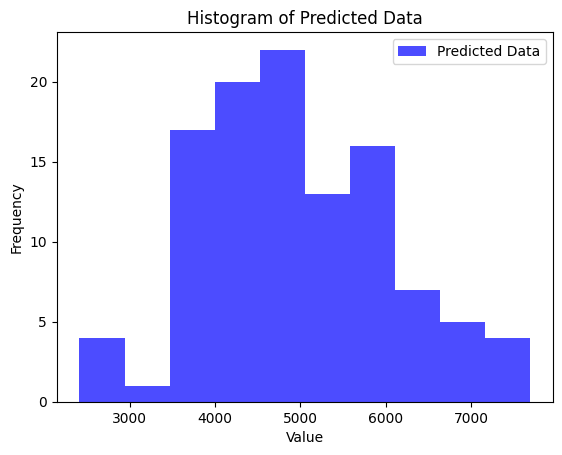

In [ ]:
plt.hist(y_pred, bins=10, color='blue', alpha=0.7, label='Predicted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Data')
plt.legend()
plt.show()

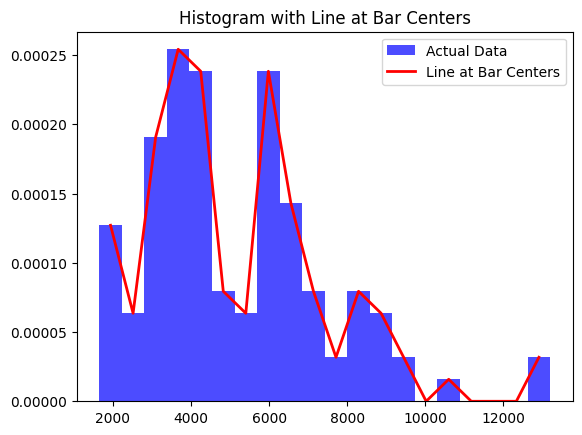

In [ ]:
hist, bins, _ = plt.hist(y_test, bins=20, color='blue', alpha=0.7, label='Actual Data', density=True)
plt.title('Histogram with Line at Bar Centers')
plt.legend()
bar_width = bins[1] - bins[0]
bar_centers = bins[:-1] + bar_width / 2
plt.plot(bar_centers, hist, color='red', linestyle='-', linewidth=2, label='Line at Bar Centers')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
coefficients = regressor.coef_
b0 = regressor.intercept_
regression_equation = "Y = {:.4f}".format(b0)
for i, coef in enumerate(coefficients):
 regression_equation += " + {:.2f} * X{}".format(coef, i + 1)
print("Regression Equation:")
print(regression_equation)

Regression Equation:
Y = 2570.0687 + 255.85 * X1 + 330.92 * X2 + -199.53 * X3 + 1059.19 * X4 + 502.50 * X5 + -486.90 * X6 + -437.27 * X7 + 626.41 * X8 + 587.83 * X9 + 1033.35 * X10 + 128.50 * X11


<Axes: >

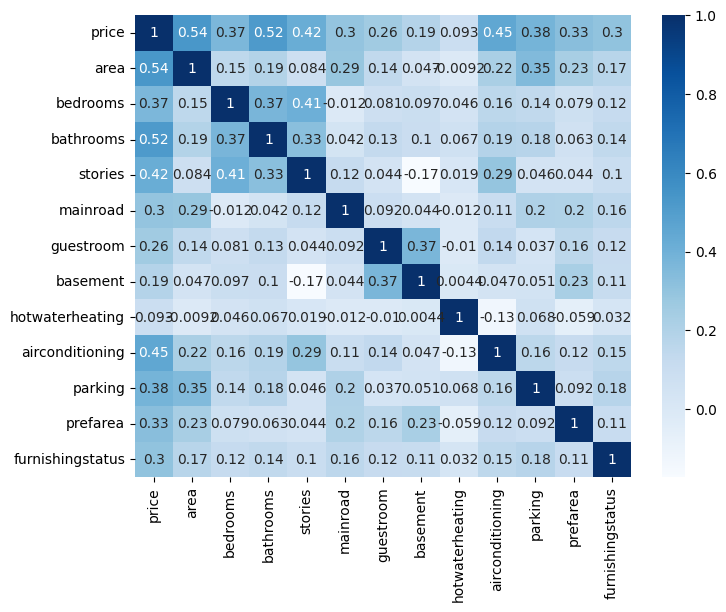

In [ ]:
data2 = dataset.copy()
#data2 = data2.drop(['Open','High','Low','Last', 'Close'],axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)